In [ ]:
# coding:utf-8
import os
import numpy as np
import cv2
import caffe
import matplotlib.pyplot as plt
import scipy 

prototxt = r"../prototxt/LCNN_deploy.prototxt"
caffemodel = r"../models/_iter_3560000.caffemodel"
th = 0.25
if not os.path.isfile(caffemodel):
    print ("caffemodel not found!")
caffe.set_mode_cpu()
net = caffe.Net(prototxt,caffemodel,caffe.TEST)

#print("blobs {}\nparams {}".format(net.blobs.keys(), net.params.keys()))
ims = ['75-1.jpg','75-2.jpg','76-1.jpg']
feats = np.zeros((3,256),dtype=np.float32)
inp = []
for i in range(0,3):
    input = cv2.imread(ims[i],0)   #read face image
    input = cv2.resize(input,(128,128),interpolation=cv2.INTER_CUBIC)   #we just need to resize the face to (128,128) 
    inp.append(input)
    img_blobinp = input[np.newaxis, np.newaxis, :, :]/255.0    #divide 255.0 ,make input is between 0-1
    net.blobs['data'].reshape(*img_blobinp.shape)
    net.blobs['data'].data[...] = img_blobinp
    net.blobs['data'].data.shape
    net.forward()  #go through the LCNN network
    feature = net.blobs['eltwise_fc1'].data    #feature is from eltwise_fc1 layer
    feats[i,:] = feature

In [3]:
similar_0_1 = 1 - scipy.spatial.distance.cosine(feats[0,:],feats[1,:])   # similarity of same person
similar_0_2 = 1 - scipy.spatial.distance.cosine(feats[0,:],feats[2,:])   # similarity of different person
similar_1_2 = 1 - scipy.spatial.distance.cosine(feats[1,:],feats[2,:])   # similarity of different person

print similar_0_1,similar_0_2,similar_1_2,"\n\n"

0.515186171273 0.0626764857128 0.0879036303003 




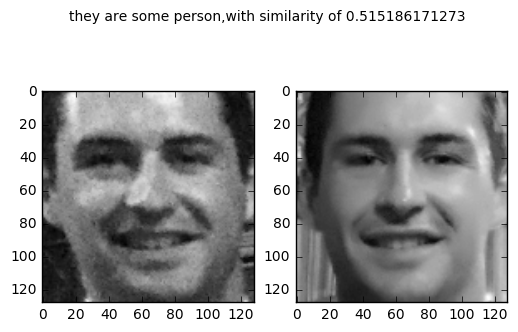

In [5]:
plt.subplot(1,2,1)
plt.imshow(inp[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(inp[1],cmap='gray')
jurgeanswer=""
if similar_0_1>th:
    jurgeanswer = "they are some person,with similarity of "+ str(similar_0_1)
else:
    jurgeanswer = "they are not some person,with similarity of "+ str(similar_0_1)
plt.suptitle(jurgeanswer)
plt.show()
#plt.savefig("f.jpg")

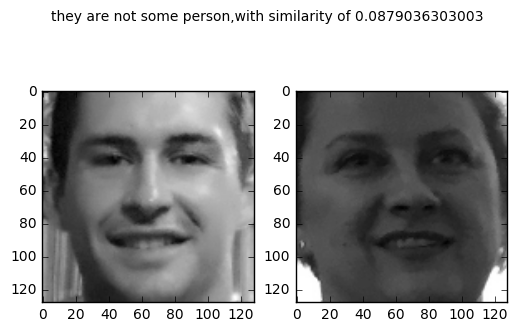

In [6]:
plt.subplot(1,2,1)
plt.imshow(inp[1],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(inp[2],cmap='gray')
jurgeanswer=""
if similar_1_2>th:
    jurgeanswer = "they are some person,with similarity of "+ str(similar_1_2)
else:
    jurgeanswer = "they are not some person,with similarity of "+ str(similar_1_2)
plt.suptitle(jurgeanswer)
plt.show()
#plt.savefig("f.jpg")